# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Putri Nur Fadillah 
- Email: pnurfadillah29@gmail.com
- Id Dicoding: Putry792

# Menentukan Pertanyaan Bisnis
- Bagaimana hubungan antara musim dan sewa sepeda harian ?
- Bagaimana hubungan antara cuaca(weathersit) dan jumlah sewa sepeda harian ?
- Apakah ada pola berdasarkan waktu(bulan) dalam jumlah sewa sepeda harian ?
- Apakah ada perbedaan antara hari kerja(working day),hari libur(holiday) dan akhir pekan(weekend) dalam jumlah sewa sepeda harian ?


# Menyiapkan semua library yang dibutuhkan

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Wrangling

Gathering Data

In [29]:
days_df = pd.read_csv('data/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
hours_df = pd.read_csv('data/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Assessing Data

Menilai Data days_df

In [31]:
# Memeriksa tipe data dari tiap kolom 
days_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


`Dapat kita lihat dari atas,terdapat 1 column yang memiliki tipe data yang tidak sesuai. Nama column yang perlu diperbaiki adalah dteday -> datetime`

In [32]:
# Memeriksa missing value 
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

`Dapat disimpulkan bahwa tabel days_df tidak memiliki missing value`

In [33]:
# Memeriksa duplikasi data
print(f'Jumlah Duplikasi: {days_df.duplicated().sum()}')

Jumlah Duplikasi: 0


In [34]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai hours_df

In [35]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


`Dapat kita lihat dari atas,terdapat 1 column yang memiliki tipe data yang tidak sesuai. Nama column yang perlu diperbaiki adalah dteday -> datetime`

In [36]:
# Mengecek missing value
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

`Dapat disimpulkan bahwa tabel hours_df tidak memiliki missing value`

In [37]:
print(f"Jumlah Duplikasi: {hours_df.duplicated().sum()}")
hours_df.describe()

Jumlah Duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cleansing Data

Menghapus tabel yang tidak dibutuhkan<br>
`Alasan saya menghapus tabel hours_df karena tidak relevan dengan pertanyaan bisnis yang sudah saya tetapkan`

In [38]:
# Menghapus tabel yang tidak diperlukan
del hours_df

In [39]:
# Mengubah nama kolom
days_df.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'cnt' : 'count'
}, inplace=True)

days_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
# Mengubah angka menjadi teks
days_df['month'] = days_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

days_df['season'] = days_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

days_df['weekday'] = days_df['weekday'].map({
    0: 'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})

days_df['weathersit'] = days_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [41]:
# Mengubah tipe data pada column dateday dari object -> datetime
days_df['dateday'] = pd.to_datetime(days_df.dateday)

# Mengubah tipe data ke categorical
days_df['season'] = days_df.season.astype('category')
days_df['year'] = days_df.year.astype('category')
days_df['month'] = days_df.month.astype('category')
days_df['holiday'] = days_df.holiday.astype('category')
days_df['weekday'] = days_df.weekday.astype('category')
days_df['workingday'] = days_df.workingday.astype('category')
days_df['weathersit'] = days_df.weathersit.astype('category')

days_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory Data Analysis (EDA)

Explorasi Data days_df

In [42]:
days_df.describe(include='all', datetime_is_numeric=True)

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengelompokkan penyewaan sepeda (casual dan registered) berdasarkan bulan

In [43]:
days_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

`Berdasarkan hasil diatas, dapat disimpulkan bahwa rata-rata tertinggi dan jumlah terbanyak adalah pada bulan Juni dan rata-rata terendah dan jumlah terendah adalah pada bulan Januari`

Menggelompokkan penyewaan sepeda berdesarkan musim(seasaon)

In [44]:
days_df.groupby('season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

`Berdasarkan hasil diatas, dapat disimpulkan bahwa rata-rata tertinggi dan jumlah terbanyak adalah pada musim gugur (Fall) dan rata-rata terendah dan jumlah terendah adalah pada musim gugur (Spring)`

Mengelompokkan penyewaan sepeda berdasarkan cuaca(weathersit)

In [45]:
days_df.groupby('weathersit').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Mist/Cloudy          8362  605  4035.862348   996858

`Berdasarkan hasil diatas, dapat disimpilkan bahwa rata-rata tertinggi dan jumlah terbanyak adalah pada saat cuaca cerah berawan(Clear/Partly Cloudy) dan rata-rata terendah dan jumlah terendah adalah pada saat cuaca salju ringan/hujan(Light Snow/Rain)`

Mengelompokkan Penyewaan Sepeda berdasarakan workingday

In [46]:
days_df.groupby('workingday').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

`Berdasarkan hasil diatas, jumlah penyewaan sepeda terbanyak adalah pada saat hari kerja(workingday)`

Menggelompokkan penyewaan sepeda berdasarkan holiday

In [47]:
days_df.groupby('holiday').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

`Berdasarkan hasil diatas, jumlah penyewaan sepeda terbanyak adalah pada saat hari-hari biasa`

Mengelompokkan penyewaan sepeda berdasarkan weekday

In [48]:
days_df.groupby('weekday', sort=False).agg({
    'count': ['max', 'min', 'mean', 'sum'],
    
})

count                           
          max   min         mean     sum
weekday                                 
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Mon      7525    22  4338.123810  455503
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048
Thu      7804   431  4667.259615  485395
Fri      8362  1167  4690.288462  487790

`Berdasarkan hasil diatas, urutan jumlah penyewaan terbanyak sampai terkecil berdasarkan weekday adalah Fri, Thu, Sat, Tue, Mon, Sun`

# Visualization & Explanatory Analysis

Pertanyaan 1 : Bagaimana hubungan antara musim dan sewa sepeda harian ?

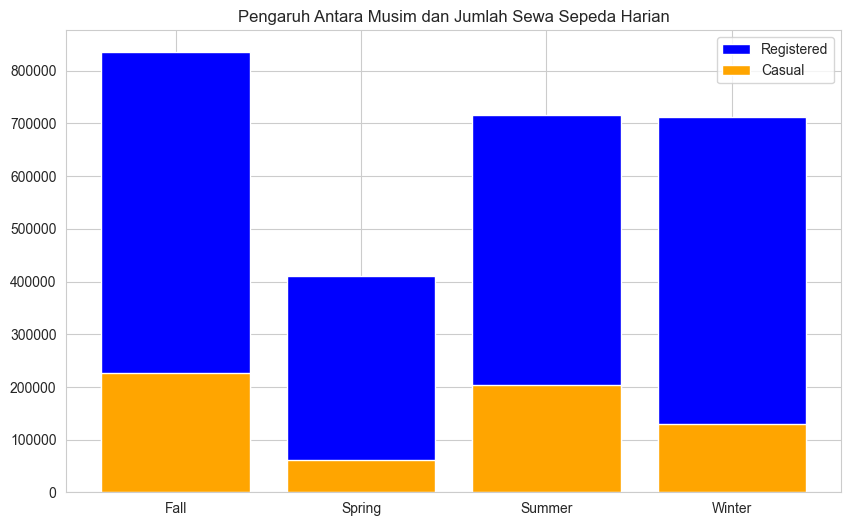

In [49]:
x = days_df.groupby('season').sum(numeric_only=True).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(
    x['season'],
    x['registered'],
    label='Registered',
    color='blue'
)

plt.bar(
    x['season'],
    x['casual'],
    label='Casual',
    color='orange'
)

plt.title('Pengaruh Antara Musim dan Jumlah Sewa Sepeda Harian')

plt.legend()
plt.show()

`Dari grafik diatas, jumlah sewa sepeda terbanyak adalah pada musim gugur(fall)`

Pertanyaan  2: Bagaimana hubungan antara cuaca(weathersit) dan jumlah sewa sepeda harian ?

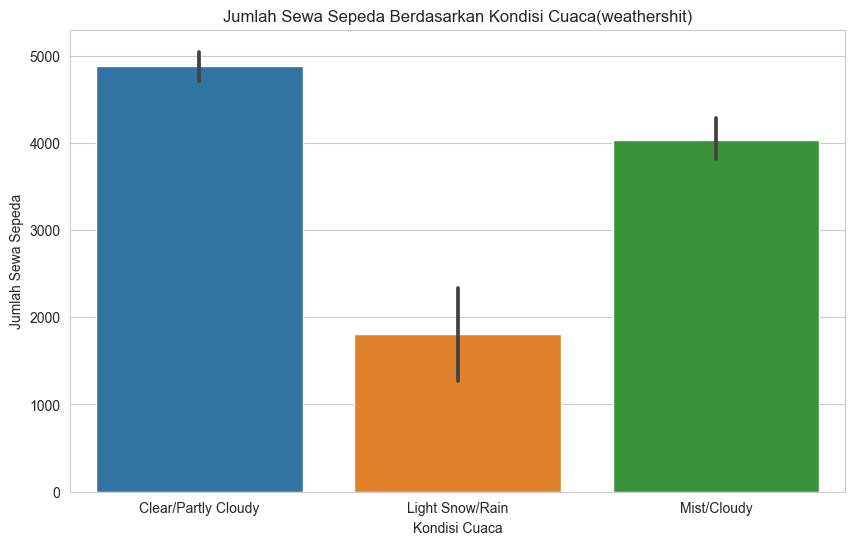

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weathersit',
    y='count',
    data=days_df,
    
)
plt.title('Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca(weathershit)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()

`Dari grafik diatas, dapat disimpulkan bahwa terdapat hubungan antara jumlah sewa sepeda dan kondisi cuaca. Jumlah penyewa sepeda paling banyak pada saat kondisi cuaca cerah berawan(Clear/Partly Cloudy) `

Pertanyaan 3 : Apakah ada pola berdasarkan waktu(bulan) dalam jumlah sewa sepeda harian ?

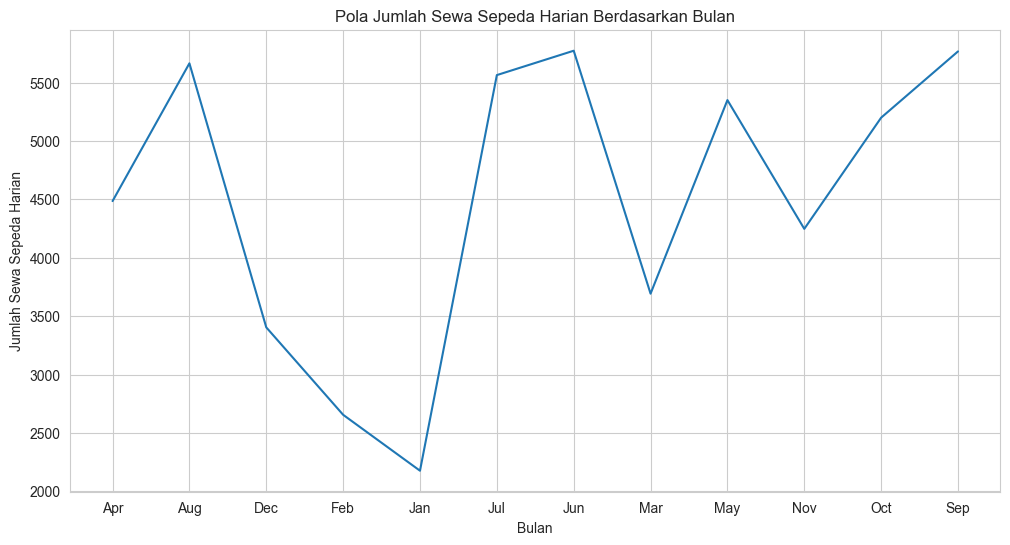

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="count", data=days_df, errorbar=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

`Dari grafik diatas, dapat dilihat bahwa jumlah sewa paling sedikit adalah pada bulan Januari dan jumlah sewa paling banyak adalah pada bulan Juni`

Pertanyaan 4 : Apakah ada perbedaan antara hari kerja(working day),hari libur(holiday) dan akhir pekan(weekend) dalam jumlah sewa sepeda harian ?

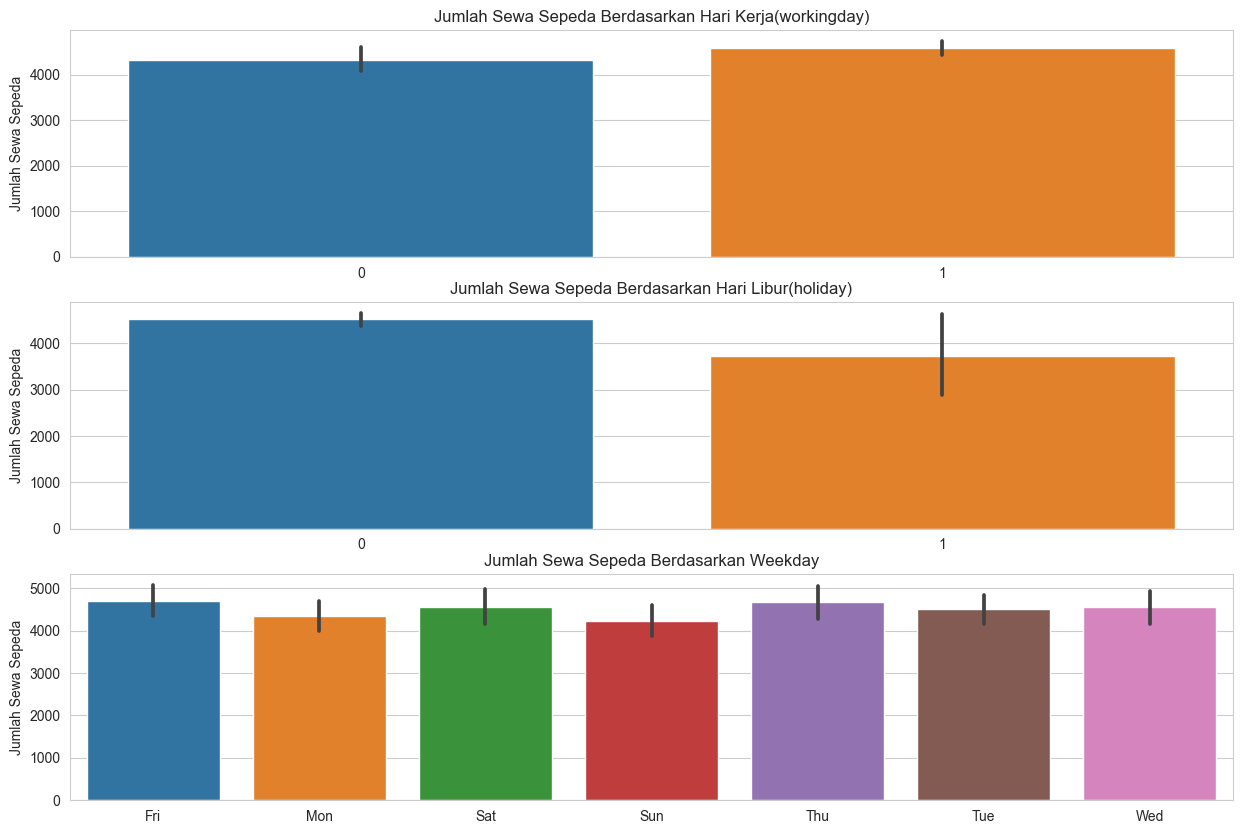

In [52]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Berdasarkan hari kerja(workingday)
sns.barplot(
    x='workingday',
    y='count',
    data=days_df,
    ax = ax[0],
   
)
ax[0].set_title('Jumlah Sewa Sepeda Berdasarkan Hari Kerja(workingday)')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Jumlah Sewa Sepeda')

# Berdasarkan hari libur (holiday)
sns.barplot(
    x='holiday',
    y='count',
    data=days_df,
    ax = ax[1],
    
)
ax[1].set_title('Jumlah Sewa Sepeda Berdasarkan Hari Libur(holiday)')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Jumlah Sewa Sepeda')

# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    data=days_df,
    ax= ax[2],
    
)
ax[2].set_title('Jumlah Sewa Sepeda Berdasarkan Weekday')
ax[2].set_xlabel(None)
ax[2].set_ylabel('Jumlah Sewa Sepeda')


plt.show()


Dari visualisasi data diatas, dapat disimpulkan :
- Jumlah penyewaan sepeda terbanyak adalah pada hari kerja. Angka 0 artinya hari kerja(Senin-Jum'at) dan angka 1 artinya weekend(Sabtu dan Minggu)
- Jumlah penyewaan sepeda jauh lebih banyak ketika hari kerja dibandingkan pada saat hari libur(holiday)
- Hari Jum'at(fri) menjadi hari dengan jumlah sewa sepeda terbanyak dalam satu minggu. Dan hari minggu(sun) menjadi hari dengan jumlah sewa sepeda tersedikit dalam satu minggu.

# Conclusion

- Pertanyaan 1 :
  Jumlah sewa sepeda tertinggi tercatat pada saat musim gugur(fall) dan jumlah sewa tertinggi kedua  tercatat pada saat musim panas(summer). Kita dapat simpulkan bahwa pada musim gugur dan musim panas adalah iklim yang paling cocok untuk bersepeda. Dan jumlah sewa sepeda terendah tercatat pada musim gugur(spring).

- Peranyaan 2 :
  Terlihat jelas dari visualisasi data yang sudah dibuat diatas, bahwa jumlah penyewa sepeda terbanyak tercatat pada saat kondisi cuaca cerah berawan(Clear/Partly Cloudy), sangat sedikit jumlah penyewa sepeda pada saat kondisi cuaca kabut, salju ringan atau hujan lebat. Hal ini dikarenakan kodisi cuaca seperti itu dapat meningkatkan kemungkinan kecelakaan di jalan raya karena jarak pandang yang rendah dan jalan yang licin, jarang sekali orang memilih untuk mengendarai sepeda disaat kondisi cuaca seperti itu.

- Pertanyaan 3 :
  Dari visualisasi data yang dibuat diatas, bahwa jumlah penyewa sepeda terbanyak tercatat pada bulan juni(Jun). Pada bulan juni ini bertepatan pada musim panas (summer). Dan julah penyewa sepeda tersedikit tercatat pada bulan Januari(Jan). Pada bulan januari ini bertepatan pada musim dingin. Kondisi jalanan menjadi licin dan hal itu berbahaya bagi pengendara sepeda. Karena hal tersebutlah membuat jumlah penyewa sepeda pada bulan januari(Jan) menjadi sedikit.

- Pertanyaa 4 :
  Visualisasi data diatas dibagi menjadi 3 bagian. 
  1. Untuk penyewaan sepeda berdasarkan workingday, jumlah penyewaan sepeda banyak tercatat pada saat workingday dibandingkan pada saat non-workingday.
  2. Untuk penyewaan sepeda berdasarkan holiday, jumlah penyewaan sepeda terbanyak adalah pada saat bukan hari libur(non-holiday).
  3. Untuk penyewaan sepeda berdasarkan weekday, jumlah penyewaan terbanyak tercatat pada hari jum'at(Fri) dan jumlah penyewaan paling sedikit tercatat pada hari minggu(sun).
  

In [53]:
days_df.to_csv('days_df.csv', index=False)